In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
def centroid_histogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()
    
    if hist.sum() != 0:
        hist /= hist.sum()

    return hist

def plot_colors(hist, centroids):
    colors = []
    for (percent, color) in zip(hist, centroids):
        color = tuple(color.astype("uint16"))
        colors.append((color, percent))
    return colors

def image_color_cluster(image_path, k=4, skip_ranges=None):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    
    clt = KMeans(n_clusters=k)
    clt.fit(image)

    hist = centroid_histogram(clt)
    colors = plot_colors(hist, clt.cluster_centers_)
    if skip_ranges is not None:
        filtered_colors = [color for color in colors if not all(skip[0] <= c <= skip[1] for c, skip in zip(color[0], skip_ranges))]
        return hist, filtered_colors
    else:
        return hist, colors

In [1313]:
image_path = 'C:/Users/user/Desktop/color/romantic/romantic_pic/romantic_100.jpg'
hist, filtered_colors = image_color_cluster(image_path, k=3, skip_ranges=[(0, 55), (0, 55), (0, 55)])

In [1314]:
def color_to_df(input):
    df_rgb = [(color[0][0], color[0][1], color[0][2]) for color in input]
    df_percent = [color[1] for color in input]

    df = pd.DataFrame(zip(df_rgb, df_percent), columns = ['c_code','occurence'])
    return df

In [1315]:
df_color = color_to_df(filtered_colors)
df_color

,c_code,occurence
0,"(250, 222, 214)",0.120565
1,"(240, 142, 154)",0.437473
2,"(233, 97, 122)",0.441962


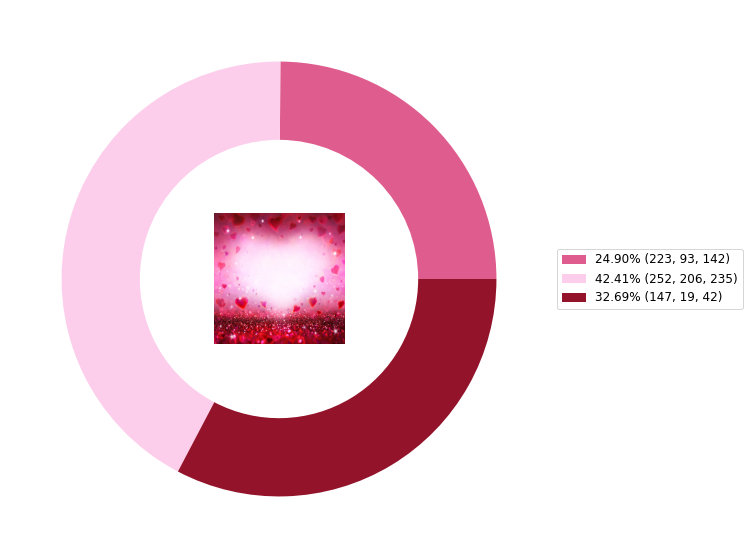

In [991]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

palette = np.array([(223, 93, 142),(252, 206, 235),(147, 19, 42)])
percentages = np.array([0.248993,0.424063,0.326944])
# Normalize percentages to sum up to 1
sum_percentages = np.sum(percentages)
normalized_percentages = percentages / sum_percentages

# Normalize RGB values to range 0-1
normalized_palette = palette / 255.0

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, text = ax.pie(normalized_percentages, colors=normalized_palette, wedgeprops=dict(width=0.3))

# Set equal aspect ratio
ax.set_aspect('equal')

# Create space in the center
plt.setp(wedges, width=0.36)
ax.set_aspect('equal')
fig.set_facecolor('white')

# Load and display the image in the center
image_path ='C:/Users/user/Desktop/color/romantic/romantic_pic/romantic_1.jpg'
image = mpimg.imread(image_path)
image_extent = (-0.3, 0.3, -0.3, 0.3)  # Adjust the extent based on the size of the image
ax.imshow(image, extent=image_extent)

# Add labels
labels = [f'{p:.2%} ({r}, {g}, {b})' for p, (r, g, b) in zip(normalized_percentages, palette)]
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

In [1316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [1317]:
!pip install extcolors

In [1318]:
!pip install colormap

  Created wheel for colormap: filename=colormap-1.0.4-py3-none-any.whl size=15620 sha256=d2481d2d0d73c5905b1bb326cf9f4ac943276bc0c3f492decf0310aef82fd650
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\31\58\37\3b4e752e680f9eef40869ad6d3d6bb9932704207384f8259b0
Successfully built colormap


In [1319]:
import cv2
import extcolors

In [1320]:
!pip install easydev

  Created wheel for easydev: filename=easydev-0.12.1-py3-none-any.whl size=64203 sha256=ec39fe6c8acbe8ef9d4de3fc91a5bf33b9cb8d90583aee23b7d44c2f2eba0230
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\ed\f7\20\2b6bbee53a7f66bb264ad2bd1416f37285afab73dcec851feb
Successfully built easydev


In [1321]:
from colormap import rgb2hex

In [1443]:
image_path = 'C:/Users/user/Desktop/color/depressed/depressed_pic/depressed_100.jpg'
skip_ranges = [(200, 255), (200, 255), (200, 255)]
colors_x = extcolors.extract_from_path(image_path, tolerance=4, limit=3) #클러스터링에서 맨 처음 함수랑 비슷한듯
filtered_colors = [color for color in colors_x[0] if not all(skip[0] <= c <= skip[1] for c, skip in zip(color[0], skip_ranges))]
filtered_colors

[((197, 219, 242), 62083), ((89, 120, 148), 53153), ((86, 135, 175), 48495)]

In [1444]:
def color_to_df(input):
    df_rgb = [(color[0][0], color[0][1], color[0][2]) for color in input]
    df_percent = [color[1] for color in input]

    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(c[0]), int(c[1]), int(c[2])) for c in df_rgb]

    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(filtered_colors)
df_color

,c_code,occurence
0,#C5DBF2,62083
1,#597894,53153
2,#5687AF,48495


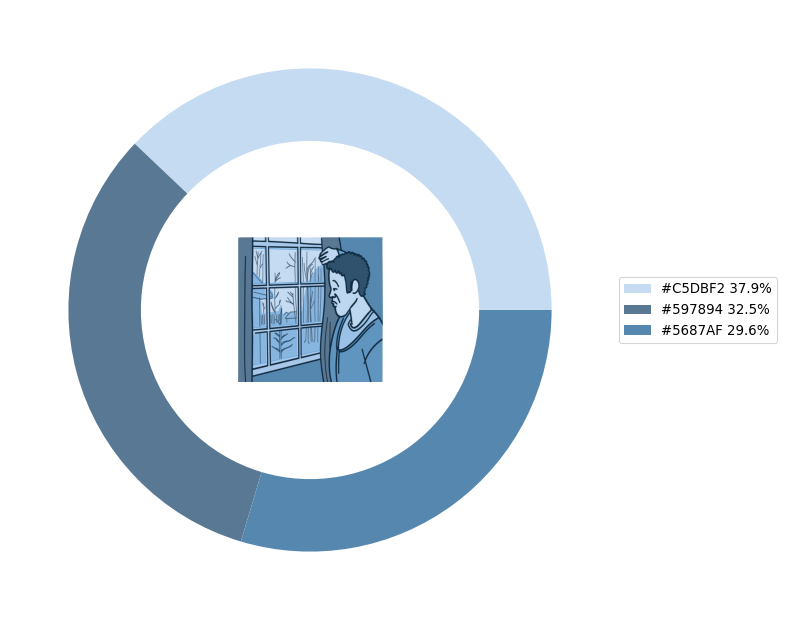

In [1445]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

list_color = list(df_color['c_code'])
list_percent = [int(i) for i in list(df_color['occurence'])]
total_percent = sum(list_percent)
text_c = [c + ' ' + str(round(p * 100 / total_percent, 1)) + '%' for c, p in zip(list_color, list_percent)]

fig, ax = plt.subplots(figsize=(10, 10), dpi=80)
wedges, text = ax.pie(list_percent,
                      labeldistance=1.05,
                      colors=list_color,
                      textprops={'fontsize': 12, 'color': 'black'})
plt.setp(wedges, width=0.3)
# Calculate the remaining percentage
remaining_percent = 100 - sum([p * 100 / total_percent for p in list_percent])
remaining_label = f'Remaining {round(remaining_percent, 1)}%'

# Load and display the image in the center
image_path = 'C:/Users/user/Desktop/color/depressed/depressed_pic/depressed_100.jpg'
image = mpimg.imread(image_path)
image_extent = (-0.3, 0.3, -0.3, 0.3)  # Adjust the extent based on the size of the image
ax.imshow(image, extent=image_extent)

ax.set_aspect("equal")
fig.set_facecolor('white')

# Add labels
labels = text_c
labels.append(remaining_label)
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.show()

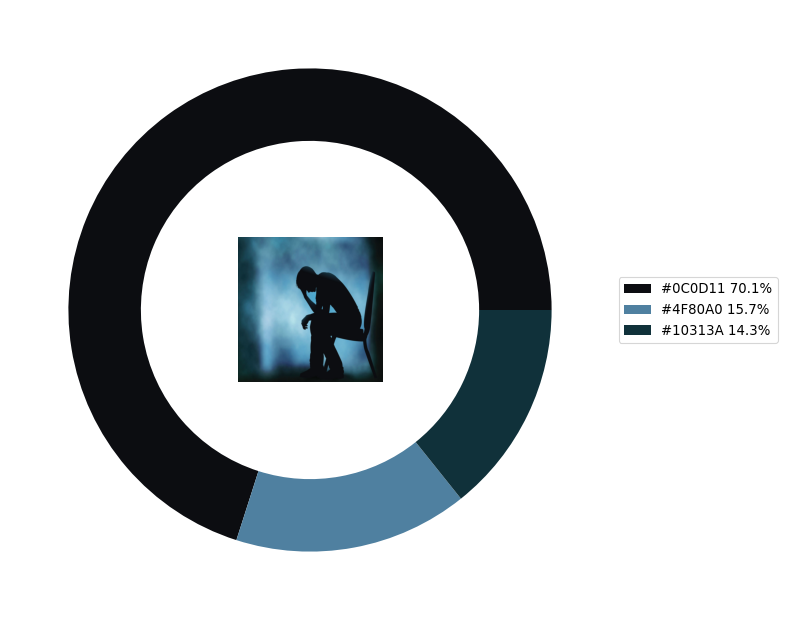